# Simulating a stock portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [3]:
#import data

In [4]:
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [22]:
stockList = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'MMC', 'PGR', 'AIG', 'AJG']
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

[*********************100%***********************]  8 of 8 completed


In [23]:
print(meanReturns)

AAPL    0.001691
AIG     0.001108
AJG     0.001061
GOOG    0.001668
MMC     0.001024
MSFT    0.001858
PGR     0.000347
TSLA    0.001198
dtype: float64


In [24]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)

[0.12574683 0.04447384 0.16759855 0.14444918 0.20845728 0.21600945
 0.04533645 0.04792843]


# MONTE CARLO SIMULATION

In [37]:
mc_sims = 500
T =100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value = meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

In [38]:
initialPortfolio = 10000

In [39]:
for m in range(0, mc_sims):
    #MC loops
    #Cholesky Decomposition
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

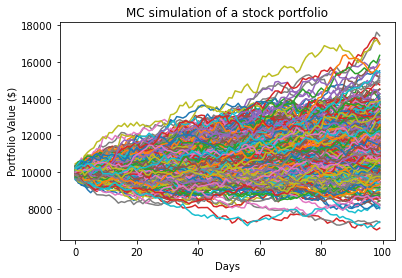

In [40]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()